In [5]:
from bluesky import RunEngine

RE = RunEngine({})

from bluesky.callbacks.best_effort import BestEffortCallback
bec = BestEffortCallback()

# Send all metadata/data captured to the BestEffortCallback.
RE.subscribe(bec)

#Get the databroker https://gist.github.com/untzag/53281819709b1058c7708a250cbd3676
from databroker.v2 import temp
db = temp()

# Insert all metadata/data captured into db.
RE.subscribe(db.v1.insert)

1

In [6]:
from ophyd.sim import det, motor
from ophyd.sim import MockFlyer
import numpy as np
flyer1 = MockFlyer('flyer1', det, motor, -5, 5, 200)



Transient Scan ID: 1     Time: 2021-07-16 13:15:06
Persistent Unique Scan ID: '11dac860-93b9-4676-b54e-a6d4bfdef240'
New stream: 'primary'
+-----------+------------+------------+
|   seq_num |       time |        det |
+-----------+------------+------------+
|         1 | 13:15:06.8 |      0.000 |
|         2 | 13:15:06.9 |      0.000 |
|         3 | 13:15:07.0 |      0.000 |
A 'deferred pause' has been requested. The RunEngine will pause at the next checkpoint. To pause immediately, hit Ctrl+C again in the next 10 seconds.
Deferred pause acknowledged. Continuing to checkpoint.
Pausing...


RunEngineInterrupted: 
Your RunEngine is entering a paused state. These are your options for changing
the state of the RunEngine:

RE.resume()    Resume the plan.
RE.abort()     Perform cleanup, then kill plan. Mark exit_stats='aborted'.
RE.stop()      Perform cleanup, then kill plan. Mark exit_status='success'.
RE.halt()      Emergency Stop: Do not perform cleanup --- just stop.


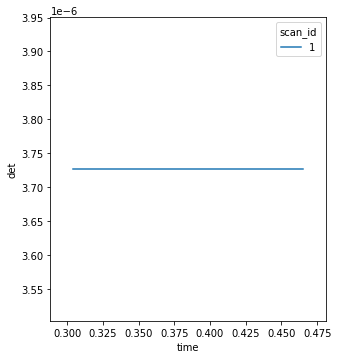

In [7]:
from bluesky.plans import count
from bluesky.preprocessors import fly_during_decorator

# Define a new plan for future use.
fly_and_count = fly_during_decorator([flyer1])(count)

# This doesn't work, count is run only after the move is complete.
RE(fly_and_count([det],delay=0.1, num=200))

Stopping: running cleanup and marking exit_status as 'success'...
New stream: 'flyer1'
+-----------+------------+------------+
generator count ['11dac860'] (scan num: 1)
LivePlot did not get any data that corresponds to the x axis. time
LivePlot did not get any data that corresponds to the y axis. motor
LivePlot did not get any data that corresponds to the x axis. time
LivePlot did not get any data that corresponds to the y axis. motor_setpoint
LivePlot did not get any data that corresponds to the x axis. time
LivePlot did not get any data that corresponds to the y axis. det





('11dac860-93b9-4676-b54e-a6d4bfdef240',)

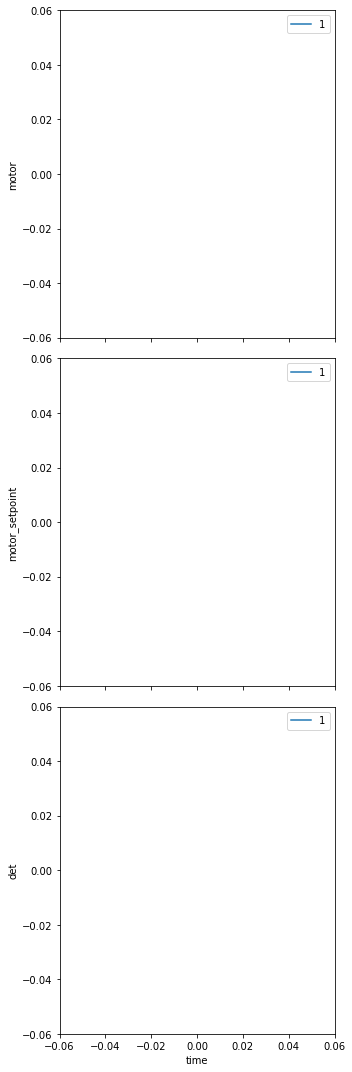

In [8]:
RE.stop()

0



Transient Scan ID: 2     Time: 2021-07-06 10:48:09
Persistent Unique Scan ID: '005fa5da-6270-4ffb-bb0d-b27deaee59d8'
Value Changed from 5.0 to -5.0 
Value Changed from 5.0 to -5.0 
Value Changed from 5.0 to -5.0 
Value Changed from 3.726653172078671e-06 to 3.726653172078671e-06 
Value Changed from -5.0 to -4.949748743718593 
Value Changed from -5.0 to -4.949748743718593 
Value Changed from -5.0 to -4.949748743718593 
Value Changed from 3.726653172078671e-06 to 4.7850871839127525e-06 
Value Changed from -4.949748743718593 to -4.899497487437186 
Value Changed from -4.949748743718593 to -4.899497487437186 
Value Changed from -4.949748743718593 to -4.899497487437186 
Value Changed from 4.7850871839127525e-06 to 6.128639250071298e-06 
Value Changed from -4.899497487437186 to -4.849246231155779 
Value Changed from -4.899497487437186 to -4.849246231155779 
Value Changed from -4.899497487437186 to -4.849246231155779 
Value Changed from 6.128639250071298e-06 to 7.829636248356623e-06 
Value Ch

/opt/tljh/user/lib/python3.7/site-packages/event_model/__init__.py:209: UserWarning: The document type 'bulk_events' has been deprecated in favor of 'event_page', whose structure is a transpose of 'bulk_events'.
  "The document type 'bulk_events' has been deprecated in favor of "


LivePlot did not get any data that corresponds to the x axis. time
LivePlot did not get any data that corresponds to the y axis. motor
LivePlot did not get any data that corresponds to the x axis. time
LivePlot did not get any data that corresponds to the y axis. motor_setpoint
LivePlot did not get any data that corresponds to the x axis. time
LivePlot did not get any data that corresponds to the y axis. det





('005fa5da-6270-4ffb-bb0d-b27deaee59d8',)

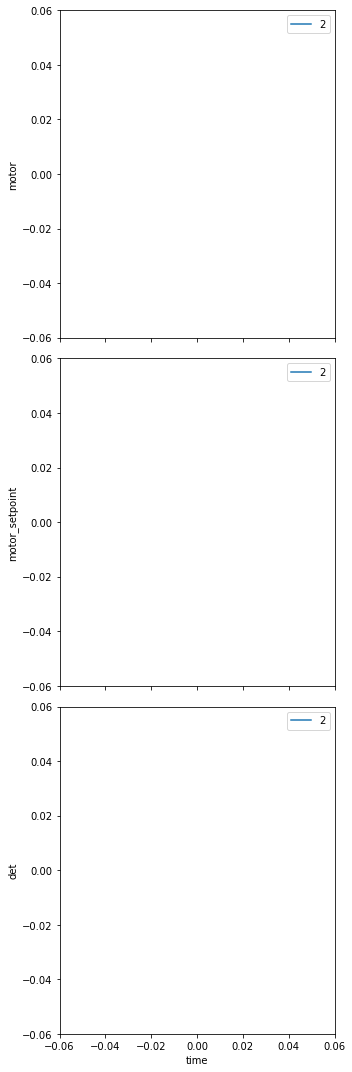

In [42]:
from bluesky.plans import fly


# if this next step succeeds, it's proof that we did this right!
RE(fly([flyer1]))

In [43]:
run = db[-1]


In [44]:
run.metadata['start']




Start({'plan_name': 'fly',
 'plan_type': 'generator',
 'scan_id': 2,
 'time': 1625561289.0412889,
 'uid': '005fa5da-6270-4ffb-bb0d-b27deaee59d8',
 'versions': {'bluesky': '1.6.7', 'ophyd': '1.6.0'}})

In [45]:
run.metadata['stop']

Stop({'exit_status': 'success',
 'num_events': {'flyer1': 200},
 'reason': '',
 'run_start': '005fa5da-6270-4ffb-bb0d-b27deaee59d8',
 'time': 1625561289.6363933,
 'uid': 'd8cde8f0-f681-45de-8adf-9d990255b35e'})

In [46]:
run.flyer1.timestamps.read()




<xarray.Dataset>
Dimensions:         (time: 200)
Coordinates:
  * time            (time) float64 1.626e+09 1.626e+09 ... 1.626e+09 1.626e+09
Data variables:
    motor           (time) float64 1.626e+09 1.626e+09 ... 1.626e+09 1.626e+09
    motor_setpoint  (time) float64 1.626e+09 1.626e+09 ... 1.626e+09 1.626e+09
    det             (time) float64 1.626e+09 1.626e+09 ... 1.626e+09 1.626e+09

In [47]:
flyer1.describe_collect()

{'flyer1': {'motor': {'source': 'SIM:motor',
   'dtype': 'number',
   'shape': [],
   'precision': 3},
  'motor_setpoint': {'source': 'SIM:motor_setpoint',
   'dtype': 'number',
   'shape': [],
   'precision': 3},
  'det': {'source': 'SIM:det',
   'dtype': 'number',
   'shape': [],
   'precision': 3}}}

In [62]:
data = run.flyer1.read()
timestamps = run.flyer1.timestamps.read()


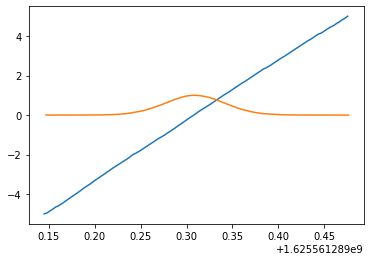

In [66]:
import matplotlib.pyplot as plt

#plt.plot(data["motor"],data["det"]) # Note that this looses lots of the context given in the xarray
plt.plot(timestamps["motor"],data["motor"])
plt.plot(timestamps["det"],data["det"])

ValueError: Dataset.plot cannot be called directly. Use an explicit plot method, e.g. ds.plot.scatter(...)